# Exploring the other DataFrames that contain hypotetical features

The aim is to clean the other dataframes to be used for the feature selection

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb

In [2]:
# We'll import the dataframe that results from the datafiles in "raw_df_for_features"
# and at the end we'll export one file with all of the hypothetical features

In [3]:
df = pd.read_csv('Data.csv')

#Reinstating the index 
df.loc[:,'date'] = pd.to_datetime(df.loc[:,'date'][:-1],format='%Y-%m ').dt.strftime('%Y-%m')
#df.loc[:,'date'] = df.loc[:,'date'].dt.strftime('%Y-%m')
df.set_index(['country','date'], inplace=True)

#Converting data into numeric types
for i in df.index:
    for j in df.columns:
        df.loc[i,j] = float(df.loc[i,j])

display(df)

df.info()

df.to_csv('CleanData.csv', index=True)

Electricity import (GWh)  Electricity export (GWh)  \
country date                                                          
AL      2007-01                       NaN                       NaN   
        2007-02                       NaN                       NaN   
        2007-03                       NaN                       NaN   
        2007-04                       NaN                       NaN   
        2007-05                       NaN                       NaN   
...                                   ...                       ...   
XK      2023-10                   243.327                    198.32   
        2023-11                       NaN                       NaN   
        2023-12                       NaN                       NaN   
        2024-01                       NaN                       NaN   
        NaN                           NaN                       NaN   

                 Electricity available (GWh)  \
country date                                   
AL      2007-01                          NaN   
        2007-02                          NaN   
        2007-03                          NaN   
        2007-04                          NaN   
        2007-05                          NaN   
...                                      ...   
XK      2023-10                      513.611   
        2023-11                          NaN   
        2023-12                          NaN   
        2024-01                          NaN   
        NaN                              NaN   

                 Electricity generated from natural gas GWh  \
country date                                                  
AL      2007-01                                         NaN   
        2007-02                                         NaN   
        2007-03                                         NaN   
        2007-04                                         NaN   
        2007-05                                         NaN   
...                                                     ...   
XK      2023-10                                         0.0   
        2023-11                                         NaN   
        2023-12                                         NaN   
        2024-01                                         NaN   
        NaN                                             NaN   

                 Total electricity generated GWh  \
country date                                       
AL      2007-01                              NaN   
        2007-02                              NaN   
        2007-03                              NaN   
        2007-04                              NaN   
        2007-05                              NaN   
...                                          ...   
XK      2023-10                          468.603   
        2023-11                              NaN   
        2023-12                              NaN   
        2024-01                              NaN   
        NaN                                  NaN   

                 Fraction of electricity generated by gas  \
country date                                                
AL      2007-01                                       NaN   
        2007-02                                       NaN   
        2007-03                                       NaN   
        2007-04                                       NaN   
        2007-05                                       NaN   
...                                                   ...   
XK      2023-10                                       0.0   
        2023-11                                       NaN   
        2023-12                                       NaN   
        2024-01                                       NaN   
        NaN                                           NaN   

                 Gas from other sources Mm3  Gas exported Mm3  \
country date                                                    
AL      2007-01                         NaN    

<class 'pandas.core.frame.DataFrame'>
MultiIndex: 8834 entries, ('AL', '2007-01') to ('XK', nan)
Data columns (total 16 columns):
 #   Column                                          Non-Null Count  Dtype  
---  ------                                          --------------  -----  
 0   Electricity import (GWh)                        7081 non-null   float64
 1   Electricity export (GWh)                        7081 non-null   float64
 2   Electricity available (GWh)                     7082 non-null   float64
 3   Electricity generated from natural gas GWh      3075 non-null   float64
 4   Total electricity generated GWh                 3101 non-null   float64
 5   Fraction of electricity generated by gas        3006 non-null   float64
 6   Gas from other sources Mm3                      1488 non-null   float64
 7   Gas exported Mm3                                3916 non-null   float64
 8   Gas consumed Mm3                                4077 non-null   float64
 9   Gas imported Mm3  

## Let's delete some dates/timestamps

In [65]:
df = pd.read_csv('CleanData.csv')
#Reinstating the index 
df.loc[:,'date'] = pd.to_datetime(df.loc[:,'date'][:-1],format='%Y-%m')
df.set_index(['country','date'], inplace=True)

#rows with little non-NaN values
df = df.dropna(thresh=round(len(df.columns)/3))

#rows after february 2020 (start of covid spreading in europe)
#df = df.loc[(slice(None), slice(None, pd.to_datetime("2020-02",format='%Y-%m'))), :]


df.info()
display(df)

<class 'pandas.core.frame.DataFrame'>
MultiIndex: 6769 entries, ('AL', Timestamp('2018-01-01 00:00:00')) to ('XK', Timestamp('2023-10-01 00:00:00'))
Data columns (total 16 columns):
 #   Column                                          Non-Null Count  Dtype  
---  ------                                          --------------  -----  
 0   Electricity import (GWh)                        6614 non-null   float64
 1   Electricity export (GWh)                        6614 non-null   float64
 2   Electricity available (GWh)                     6615 non-null   float64
 3   Electricity generated from natural gas GWh      3075 non-null   float64
 4   Total electricity generated GWh                 3101 non-null   float64
 5   Fraction of electricity generated by gas        3006 non-null   float64
 6   Gas from other sources Mm3                      1486 non-null   float64
 7   Gas exported Mm3                                3912 non-null   float64
 8   Gas consumed Mm3                           

Electricity import (GWh)  Electricity export (GWh)  \
country date                                                             
AL      2018-01-01                    97.366                   244.825   
        2018-02-01                    10.377                   379.292   
        2018-03-01                     6.913                   580.513   
        2018-04-01                     6.436                   593.729   
        2018-05-01                    11.847                   432.244   
...                                      ...                       ...   
XK      2023-06-01                   201.925                   196.891   
        2023-07-01                   268.050                   226.059   
        2023-08-01                   293.908                   202.609   
        2023-09-01                   246.256                   202.573   
        2023-10-01                   243.327                   198.320   

                    Electricity available (GWh)  \
country date                                      
AL      2018-01-01                      588.340   
        2018-02-01                      542.046   
        2018-03-01                      564.343   
        2018-04-01                      465.565   
        2018-05-01                      476.886   
...                                         ...   
XK      2023-06-01                      454.795   
        2023-07-01                      520.260   
        2023-08-01                      514.419   
        2023-09-01                      459.781   
        2023-10-01                      513.611   

                    Electricity generated from natural gas GWh  \
country date                                                     
AL      2018-01-01                                         0.0   
        2018-02-01                                         0.0   
        2018-03-01                                         0.0   
        2018-04-01                                         0.0   
        2018-05-01                                         0.0   
...                                                        ...   
XK      2023-06-01                                         0.0   
        2023-07-01                                         0.0   
        2023-08-01                                         0.0   
        2023-09-01                                         0.0   
        2023-10-01                                         0.0   

                    Total electricity generated GWh  \
country date                                          
AL      2018-01-01                          884.286   
        2018-02-01                         1054.965   
        2018-03-01                         1291.465   
        2018-04-01                         1174.183   
        2018-05-01                         1007.731   
...                                             ...   
XK      2023-06-01                          449.761   
        2023-07-01                          478.270   
        2023-08-01                          423.120   
        2023-09-01                          416.098   
        2023-10-01                          468.603   

                    Fraction of electricity generated by gas  \
country date                                                   
AL      2018-01-01                                       0.0   
        2018-02-01                                       0.0   
        2018-03-01                                       0.0   
        2018-04-01                                       0.0   
        2018-05-01                                       0.0   
...                                                      ...   
XK      2023-06-01                                       0.0   
        2023-07-01                                       0.0   
        2023-08-01                                       0.0   
        2023-09-01                                       0.0   
        2023-10-01                                

Let's now delete some columns

In [66]:
#dropping columns with few entries
df = df.drop('Gas from other sources Mm3',axis=1)

#let's investigate the 4 columns of electricity and gas prices for industry and households



#S

In [67]:
normalized_df = (df - df.min()) / (df.max() - df.min())
display(normalized_df)
normalized_df.loc[:,'Electricity available (GWh)'].max()

Electricity import (GWh)  Electricity export (GWh)  \
country date                                                             
AL      2018-01-01                  0.011762                  0.027248   
        2018-02-01                  0.001609                  0.042073   
        2018-03-01                  0.001205                  0.064258   
        2018-04-01                  0.001149                  0.065715   
        2018-05-01                  0.001781                  0.047911   
...                                      ...                       ...   
XK      2023-06-01                  0.023965                  0.021963   
        2023-07-01                  0.031683                  0.025179   
        2023-08-01                  0.034701                  0.022594   
        2023-09-01                  0.029139                  0.022590   
        2023-10-01                  0.028797                  0.022121   

                    Electricity available (GWh)  \
country date                                      
AL      2018-01-01                     0.010287   
        2018-02-01                     0.009481   
        2018-03-01                     0.009869   
        2018-04-01                     0.008150   
        2018-05-01                     0.008347   
...                                         ...   
XK      2023-06-01                     0.007963   
        2023-07-01                     0.009102   
        2023-08-01                     0.009000   
        2023-09-01                     0.008049   
        2023-10-01                     0.008986   

                    Electricity generated from natural gas GWh  \
country date                                                     
AL      2018-01-01                                         0.0   
        2018-02-01                                         0.0   
        2018-03-01                                         0.0   
        2018-04-01                                         0.0   
        2018-05-01                                         0.0   
...                                                        ...   
XK      2023-06-01                                         0.0   
        2023-07-01                                         0.0   
        2023-08-01                                         0.0   
        2023-09-01                                         0.0   
        2023-10-01                                         0.0   

                    Total electricity generated GWh  \
country date                                          
AL      2018-01-01                         0.015264   
        2018-02-01                         0.018241   
        2018-03-01                         0.022366   
        2018-04-01                         0.020320   
        2018-05-01                         0.017417   
...                                             ...   
XK      2023-06-01                         0.007684   
        2023-07-01                         0.008181   
        2023-08-01                         0.007219   
        2023-09-01                         0.007097   
        2023-10-01                         0.008013   

                    Fraction of electricity generated by gas  \
country date                                                   
AL      2018-01-01                                       0.0   
        2018-02-01                                       0.0   
        2018-03-01                                       0.0   
        2018-04-01                                       0.0   
        2018-05-01                                       0.0   
...                                                      ...   
XK      2023-06-01                                       0.0   
        2023-07-01                                       0.0   
        2023-08-01                                       0.0   
        2023-09-01                                       0.0   
        2023-10-01                                

1.0

### Let's see what are the countries which depend most on gas

In [68]:
df.loc[(slice(None),slice(None)),'Fraction of electricity generated by gas'] > 0.4
#df[df.eq('0.974316815731312').any(1)]
#df = df.loc[:,df.columns.str.contains('GWh')]
pd.options.display.max_seq_items = 1000
display(df.loc[df.loc[df['Fraction of electricity generated by gas'] > 0.55].index[:],['Electricity generated from natural gas GWh','Fraction of electricity generated by gas']])
#display(df.loc[df['Fraction of electricity generated by gas'] > 0.55].index[:])
gascountries = df.loc[df['Fraction of electricity generated by gas'] > 0.55].index[:].get_level_values('country').unique()
print(gascountries)
pd.options.display.max_seq_items = 100

Electricity generated from natural gas GWh  \
country date                                                     
GE      2022-12-01                                     662.019   
        2023-01-01                                     697.429   
        2023-02-01                                     615.655   
IE      2017-06-01                                    1293.201   
        2017-07-01                                    1477.708   
...                                                        ...   
NL      2020-09-01                                    5732.896   
        2020-11-01                                    5916.833   
        2020-12-01                                    6120.870   
        2021-02-01                                    5860.451   
        2021-06-01                                    4780.527   

                    Fraction of electricity generated by gas  
country date                                                  
GE      2022-12-01                                  0.612479  
        2023-01-01                                  0.649910  
        2023-02-01                                  0.645236  
IE      2017-06-01                                  0.572542  
        2017-07-01                                  0.628362  
...                                                      ...  
NL      2020-09-01                                  0.578006  
        2020-11-01                                  0.582692  
        2020-12-01                                  0.578108  
        2021-02-01                                  0.554794  
        2021-06-01                                  0.556338  

[118 rows x 2 columns]

Index(['GE', 'IE', 'IT', 'LT', 'LV', 'MD', 'MT', 'NL'], dtype='object', name='country')


It seems the countries which most rely on gas to produce electricity are Germany, Ireland, Italy, Latvia, Lithuania Moldova, Malta and the Netherlands. However, our dear hometown Italy lacks some data about its energy mix, so we will not analyze it. Our choices fall on

In [76]:
pd.set_option('display.max_rows', 1300)
display(df.loc[(gascountries,slice(None)),'Fraction of electricity generated by gas'])
display(df.loc['NL'])
pd.set_option('display.max_rows', 100)

country  date      
GE       2018-01-01    0.316222
         2018-02-01    0.346337
         2018-03-01    0.205239
         2018-04-01    0.030306
         2018-05-01    0.062851
         2018-06-01    0.002341
         2018-07-01    0.005398
         2018-08-01    0.148120
         2018-09-01    0.184415
         2018-10-01    0.247421
         2018-11-01    0.360187
         2018-12-01    0.272989
         2019-01-01    0.392828
         2019-02-01    0.439731
         2019-03-01    0.429452
         2019-04-01    0.159738
         2019-05-01    0.000127
         2019-06-01    0.005758
         2019-07-01    0.003086
         2019-08-01    0.131671
         2019-09-01    0.246916
         2019-10-01    0.261682
         2019-11-01    0.433174
         2019-12-01    0.447182
         2020-01-01    0.529441
         2020-02-01    0.464256
         2020-03-01    0.171922
         2020-04-01    0.153767
         2020-05-01    0.012730
         2020-06-01    0.000026
         2020-07-01 

,Electricity import (GWh),Electricity export (GWh),Electricity available (GWh),Electricity generated from natural gas GWh,Total electricity generated GWh,Fraction of electricity generated by gas,Gas exported Mm3,Gas consumed Mm3,Gas imported Mm3,Gas produced Mm3,"Gas price for households, no tax €/kWh","Gas price for industries, no tax €/kWh","Electricity price for households, no tax €/kWh","Electricity price for industries, no tax €/kWh",Population
date,,,,,,,,,,,,,,,
2008-01-01,2273.000,1011.000,10753.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0425,0.0276,0.1304,0.0787,NaN
2008-02-01,1881.000,823.000,9729.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0425,0.0276,0.1304,0.0787,NaN
2008-03-01,2454.000,1545.000,10425.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0425,0.0276,0.1304,0.0787,NaN
2008-04-01,2081.000,1211.000,9190.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0425,0.0276,0.1304,0.0787,NaN
2008-05-01,2376.000,593.000,9311.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0425,0.0276,0.1304,0.0787,NaN
2008-06-01,2265.000,348.000,9221.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0425,0.0276,0.1304,0.0787,NaN
2008-07-01,2131.000,341.000,9243.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0477,0.0313,0.1339,0.0816,NaN
2008-08-01,2333.000,340.000,9274.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0477,0.0313,0.1339,0.0816,NaN
2008-09-01,1881.000,589.000,9488.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0477,0.0313,0.1339,0.0816,NaN


The Netherlands, Germany and Latvia have the most complete data on this front. Our choice for the analysis will be XXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXX

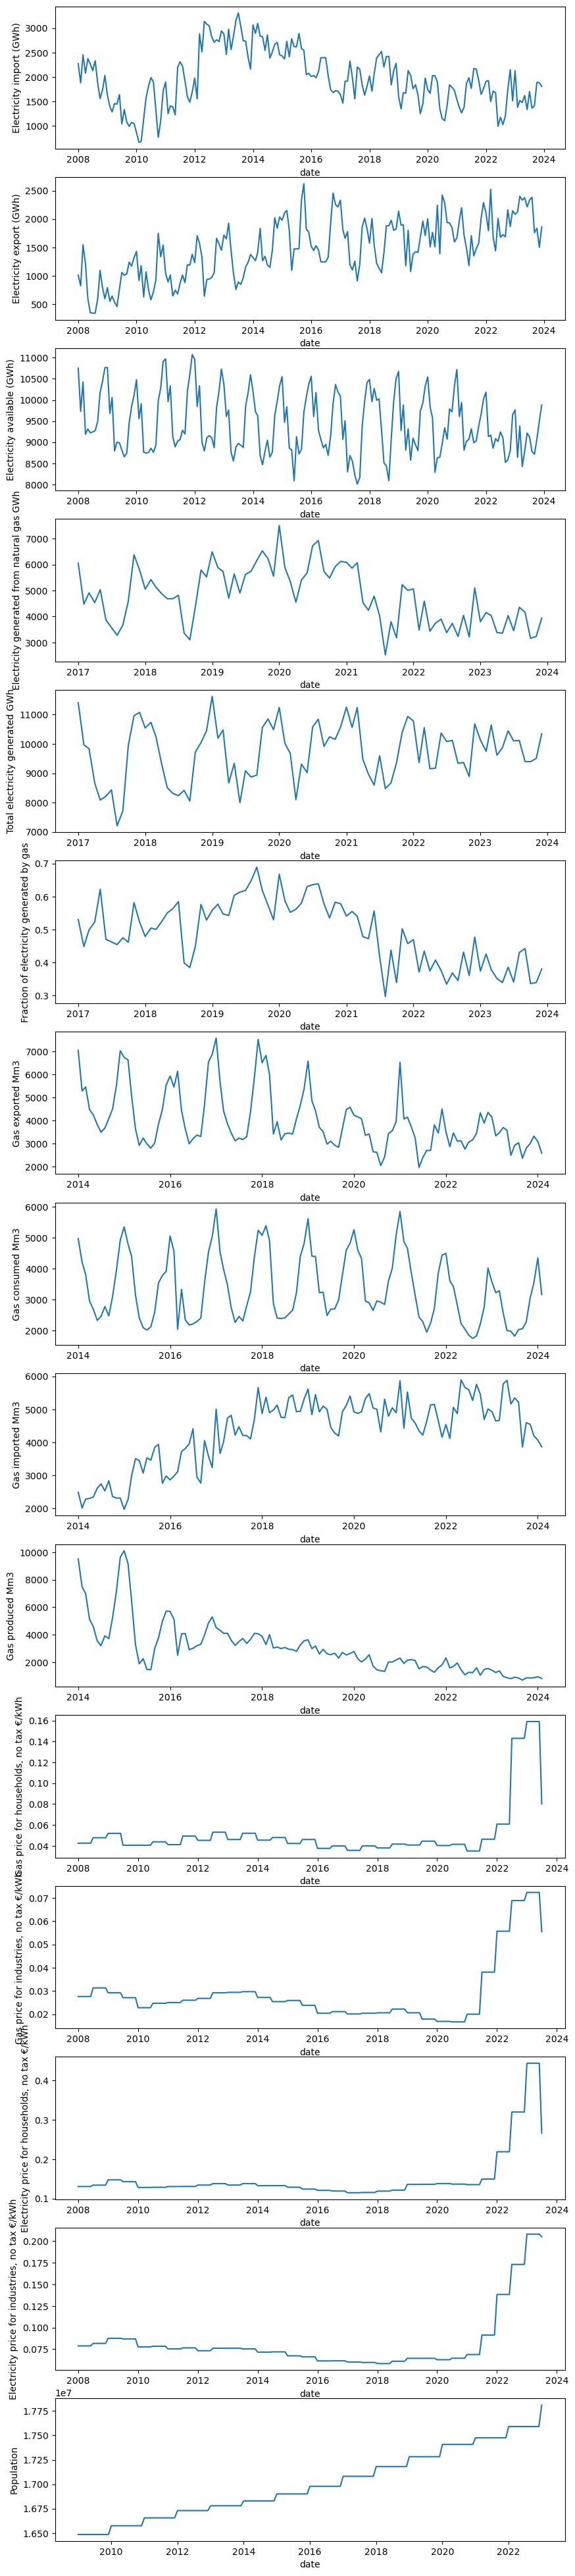

In [78]:
#Creating a datafile for ###### only
dfNL = df.loc['NL']
df_melted = dfNL.melt(id_vars=['Electricity import (GWh)'], value_vars=['Electricity available (GWh)'])

'''
#Plot everything normalized
normalized_df = (dfNL - dfNL.min()) / (dfNL.max() - dfNL.min())
df_melted = normalized_df.melt(id_vars=['Electricity import (GWh)'], value_vars=df.columns)
sb.lineplot(data=df_melted)
'''

# Plotting everything

fig, axes = plt.subplots(len(df.columns),1,figsize = (10,50))

for i in range(0,len(dfNL.columns)):
    sb.lineplot(data = dfNL[dfNL.columns[i]], ax=axes[i]) 



Let's investigate if the data available only from 2014 (Gas flow) or 2017 (Electricity production) on are influential to regress gas imports. Let's start by plotting the gas data against gas consumption.

,Electricity import (GWh),Electricity export (GWh),Electricity available (GWh),Electricity generated from natural gas GWh,Total electricity generated GWh,Fraction of electricity generated by gas,Gas exported Mm3,Gas consumed Mm3,Gas imported Mm3,Gas produced Mm3,"Gas price for households, no tax €/kWh","Gas price for industries, no tax €/kWh","Electricity price for households, no tax €/kWh","Electricity price for industries, no tax €/kWh",Population
Electricity import (GWh),1.000000,0.064011,-0.176742,-0.601652,-0.544854,-0.329532,-0.144163,-0.340554,-0.575467,0.327405,0.343218,0.307183,-0.037081,-0.178402,0.144560
Electricity export (GWh),0.064011,1.000000,0.267089,0.435994,0.782456,-0.109991,0.490463,0.550923,0.074182,0.234827,-0.297418,-0.472714,-0.396335,-0.613289,0.553302
Electricity available (GWh),-0.176742,0.267089,1.000000,0.704437,0.869258,0.223969,0.747969,0.780461,0.041710,0.391137,0.095658,0.071684,0.088891,0.089003,-0.039358
Electricity generated from natural gas GWh,-0.601652,0.435994,0.704437,1.000000,0.754828,0.764495,0.363797,0.628937,0.245628,-0.129243,0.296787,-0.552320,0.552681,0.455906,0.545378
Total electricity generated GWh,-0.544854,0.782456,0.869258,0.754828,1.000000,0.161554,0.787543,0.920470,0.380085,0.230943,0.069346,-0.236129,0.224897,0.151272,0.252356
Fraction of electricity generated by gas,-0.329532,-0.109991,0.223969,0.764495,0.161554,1.000000,-0.192335,0.051532,-0.002811,-0.411375,0.352374,-0.580632,0.609831,0.536681,0.569763
Gas exported Mm3,-0.144163,0.490463,0.747969,0.363797,0.787543,-0.192335,1.000000,0.838257,-0.137415,0.647261,-0.106673,0.127035,-0.092572,0.017477,-0.145173
Gas consumed Mm3,-0.340554,0.550923,0.780461,0.628937,0.920470,0.051532,0.838257,1.000000,0.122579,0.486183,-0.123095,-0.124035,0.086353,-0.065142,0.194718
Gas imported Mm3,-0.575467,0.074182,0.041710,0.245628,0.380085,-0.002811,-0.137415,0.122579,1.000000,-0.607405,-0.473674,-0.727997,-0.171022,-0.698625,0.863110
Gas produced Mm3,0.327405,0.234827,0.391137,-0.129243,0.230943,-0.411375,0.647261,0.486183,-0.607405,1.000000,0.206256,0.521804,0.066320,0.414672,-0.518105


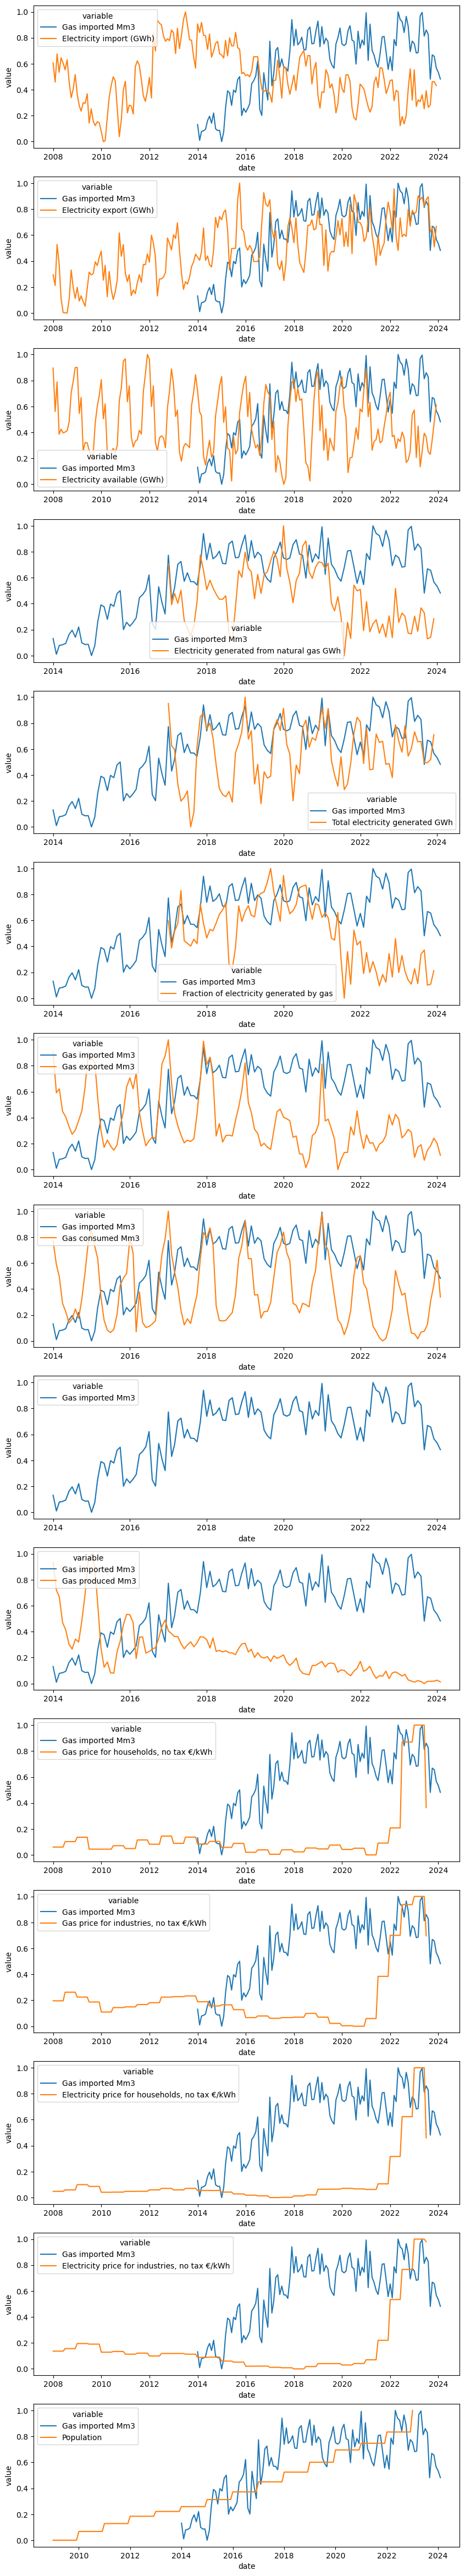

In [79]:

#Plotting normalized data
dfNLn = dfNL.copy(deep=True)

for column in dfNLn.columns: #what I do here is put all values on a scale from 0 to 1, where 0 corresponds to min value and 1 to max value
    dfNLn.loc[:,column] = (dfNLn.loc[:,column] - dfNLn.loc[:,column].min())/(dfNLn.loc[:,column].max() - dfNLn.loc[:,column].min())

dfNLn = dfNLn.reset_index()

fig, axes = plt.subplots(len(dfNLn.columns)-1,1,figsize = (10,60))

j = 1
for i in range(0,len(dfNLn.columns)-1):
    sb.lineplot(x='date', y='value', hue='variable',data = pd.melt(dfNLn[['date','Gas imported Mm3',dfNLn.columns[j]]], ['date']), ax=axes[i])
    j = j + 1

dfNLn = dfNLn.set_index('date')

#let's see for only the non-NaN values
display(dfNLn.loc[slice(None, pd.to_datetime("2020-02",format='%Y-%m')), :].corr())


COMMENTS TO BE MADE (and as such the fraction of electricity generated by gas) is a good indicator of how much gas Portugal imports, as well as gas consumed. Electricity exports on the other hand seem to be inversely correlated to the metric of our interest. From the correlation matrix, however, none of these values shows a strong correlation (0.8 or more). This latter matrix shows a connection between the gas prices for housings and industry and the industry's prices for electricity and gas, while the electricity price for housing and industry are not well linked, as well as the household prices for gas and electricity (a high electricity price does not correlate strongly to a high price of gas).


In [81]:
dfNL = dfNL.drop(['Population','Gas price for households, no tax €/kWh','Gas price for industries, no tax €/kWh','Electricity price for households, no tax €/kWh','Electricity price for industries, no tax €/kWh'],axis=1)

### Feature engineering and selection

,Electricity import (GWh),Electricity export (GWh),Electricity available (GWh),Electricity generated from natural gas GWh,Total electricity generated GWh,Fraction of electricity generated by gas,Gas exported Mm3,Gas consumed Mm3,Gas imported Mm3,Gas produced Mm3,Month,sinMonth,Gas imported last month Mm3
Electricity import (GWh),1.000000,0.064011,-0.176742,-0.601652,-0.544854,-0.329532,-0.144163,-0.340554,-0.575467,0.327405,-0.009741,0.168254,-0.563439
Electricity export (GWh),0.064011,1.000000,0.267089,0.435994,0.782456,-0.109991,0.490463,0.550923,0.074182,0.234827,0.088060,-0.249288,-0.079449
Electricity available (GWh),-0.176742,0.267089,1.000000,0.704437,0.869258,0.223969,0.747969,0.780461,0.041710,0.391137,0.000944,-0.605502,0.013892
Electricity generated from natural gas GWh,-0.601652,0.435994,0.704437,1.000000,0.754828,0.764495,0.363797,0.628937,0.245628,-0.129243,-0.119580,-0.442452,-0.017785
Total electricity generated GWh,-0.544854,0.782456,0.869258,0.754828,1.000000,0.161554,0.787543,0.920470,0.380085,0.230943,-0.148788,-0.696605,0.041834
Fraction of electricity generated by gas,-0.329532,-0.109991,0.223969,0.764495,0.161554,1.000000,-0.192335,0.051532,-0.002811,-0.411375,-0.048567,-0.014883,-0.044113
Gas exported Mm3,-0.144163,0.490463,0.747969,0.363797,0.787543,-0.192335,1.000000,0.838257,-0.137415,0.647261,-0.189104,-0.726296,-0.174087
Gas consumed Mm3,-0.340554,0.550923,0.780461,0.628937,0.920470,0.051532,0.838257,1.000000,0.122579,0.486183,-0.217652,-0.764882,0.089665
Gas imported Mm3,-0.575467,0.074182,0.041710,0.245628,0.380085,-0.002811,-0.137415,0.122579,1.000000,-0.607405,0.047166,0.019418,0.876193
Gas produced Mm3,0.327405,0.234827,0.391137,-0.129243,0.230943,-0.411375,0.647261,0.486183,-0.607405,1.000000,-0.163508,-0.459166,-0.586996


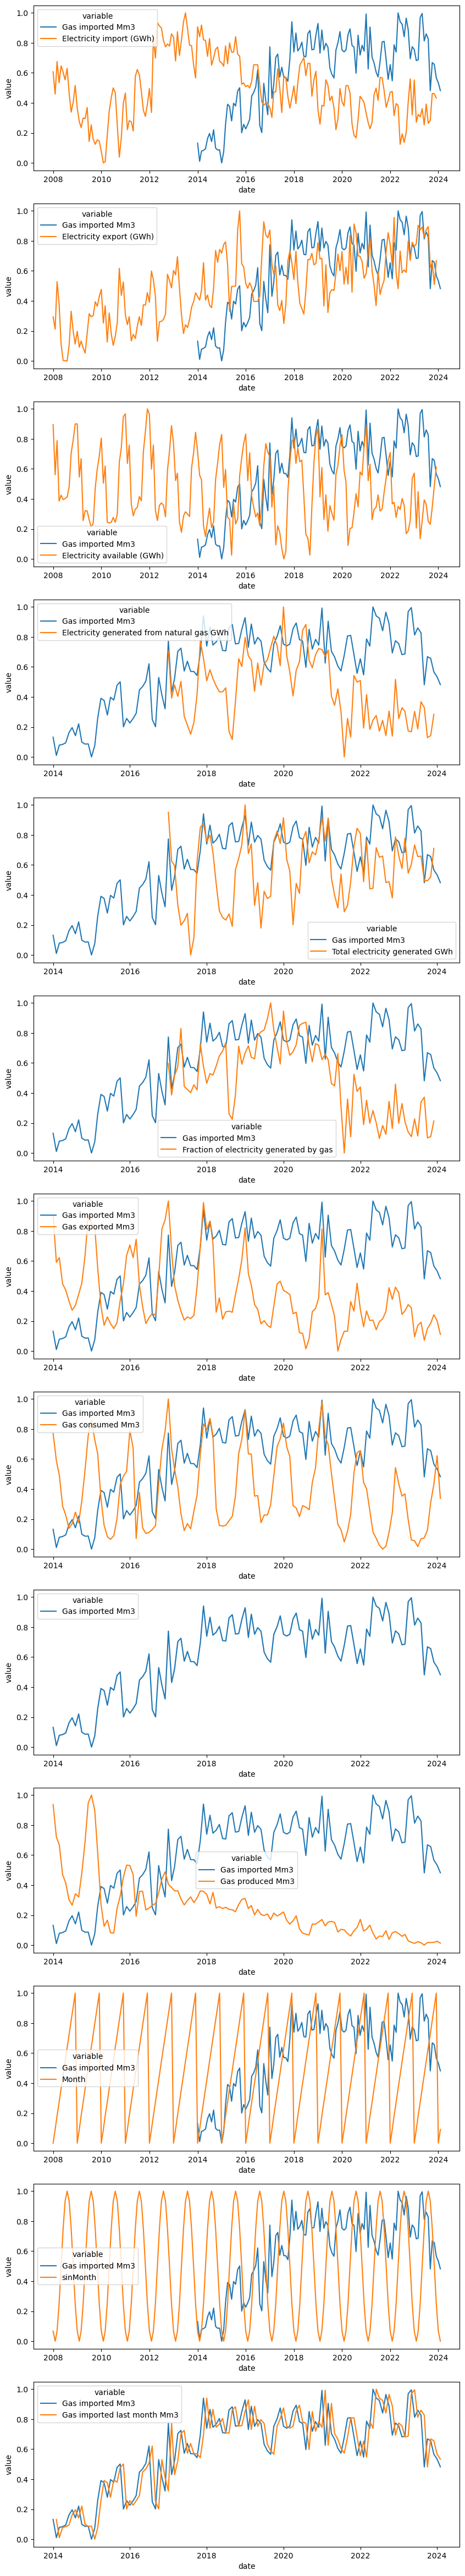

In [83]:
dfNL['Month'] = dfNL.index.month

dfNL['sinMonth'] = 1 + np.sin((dfNL['Month']-5)/6*np.pi) #January is numerically close to December

dfNL['Gas imported last month Mm3'] = dfNL['Gas imported Mm3'].shift(1) # Gas imported the last month


#Plotting normalized data
dfNLn = dfNL.copy(deep=True)

for column in dfNLn.columns: #what I do here is put all values on a scale from 0 to 1, where 0 corresponds to min value and 1 to max value
    dfNLn.loc[:,column] = (dfNLn.loc[:,column] - dfNLn.loc[:,column].min())/(dfNLn.loc[:,column].max() - dfNLn.loc[:,column].min())

dfNLn = dfNLn.reset_index()

fig, axes = plt.subplots(len(dfNLn.columns)-1,1,figsize = (10,60))

j = 1
for i in range(0,len(dfNLn.columns)-1):
    sb.lineplot(x='date', y='value', hue='variable',data = pd.melt(dfNLn[['date','Gas imported Mm3',dfNLn.columns[j]]], ['date']), ax=axes[i])
    j = j + 1

dfNLn = dfNLn.set_index('date')

#let's see for only the non-NaN values
display(dfNLn.loc[slice(None, pd.to_datetime("2020-02",format='%Y-%m')), :].corr())


In [ ]:

dfNL = dfNL.drop(['Population','Gas price for households, no tax €/kWh','Gas price for industries, no tax €/kWh','Electricity price for households, no tax €/kWh','Electricity price for industries, no tax €/kWh'],axis=1)